In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from sklearn import datasets
from sklearn.model_selection import train_test_split
%matplotlib inline
plt.style.use('seaborn')
import warnings
warnings.simplefilter("ignore")

In [ ]:
satisfy_test = pd.read_csv('/content/drive/MyDrive/test.csv')
satisfy_train = pd.read_csv('/content/drive/MyDrive/train.csv')

In [ ]:
satisfy_test.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,Female,Loyal Customer,61,Personal Travel,Eco,2037,1,1,1,...,5,5,5,5,5,3,5,3,51,58.0
1,2,Female,disloyal Customer,27,Business travel,Business,1846,1,1,1,...,1,1,3,4,5,4,4,1,0,0.0
2,3,Female,Loyal Customer,52,Business travel,Business,1622,4,4,4,...,4,5,5,5,5,4,5,3,0,0.0
3,4,Male,Loyal Customer,54,Business travel,Business,3534,4,4,4,...,5,2,2,2,2,5,2,1,0,0.0
4,5,Female,Loyal Customer,41,Business travel,Eco,1471,4,3,3,...,4,4,3,1,2,5,4,4,0,0.0


In [ ]:
# 결측치 확인
def check_missing_col(dataframe):
    missing_col = []
    for col in dataframe.columns:
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            print(f'결측치가 있는 컬럼은: {col} 입니다')
            print(f'해당 컬럼에 총 {missing_values} 개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
    if missing_col == []:
        print('결측치가 존재하지 않습니다')
    return missing_col

missing_col = check_missing_col(satisfy_train)

결측치가 존재하지 않습니다


In [ ]:
# 데이터 타입 확인
satisfy_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 24 columns):
id                                   3000 non-null int64
Gender                               3000 non-null object
Customer Type                        3000 non-null object
Age                                  3000 non-null int64
Type of Travel                       3000 non-null object
Class                                3000 non-null object
Flight Distance                      3000 non-null int64
Seat comfort                         3000 non-null int64
Departure/Arrival time convenient    3000 non-null int64
Food and drink                       3000 non-null int64
Gate location                        3000 non-null int64
Inflight wifi service                3000 non-null int64
Inflight entertainment               3000 non-null int64
Online support                       3000 non-null int64
Ease of Online booking               3000 non-null int64
On-board service                  

In [ ]:
numeric_feature = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
ordinal_feature = ['Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 
           'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 
           'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding']
categorical_feature = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

In [ ]:
## 범주형 데이터 숫자로 변경하기
## Gender column 
gender_mapping = {"Female": 1, "Male": 0}
satisfy_train['Gender'] = satisfy_train['Gender'].map(gender_mapping) 
satisfy_test['Gender'] = satisfy_test['Gender'].map(gender_mapping) 
 
## Customer type   
customer_type_mapping = {"Loyal Customer": 1, "disloyal Customer": 0}
satisfy_train['Customer Type'] = satisfy_train['Customer Type'].map(customer_type_mapping) 
satisfy_test['Customer Type'] = satisfy_test['Customer Type'].map(customer_type_mapping) 

## Type of travel   
travel_type_mapping = {"Business travel": 2, "Personal Travel": 1}
satisfy_train['Type of Travel'] = satisfy_train['Type of Travel'].map(travel_type_mapping)  
satisfy_test['Type of Travel'] = satisfy_test['Type of Travel'].map(travel_type_mapping)  

## Class column
class_mapping = {"Business": 3, "Eco Plus": 2, "Eco": 1}
satisfy_train['Class'] = satisfy_train['Class'].map(class_mapping)  
satisfy_test['Class'] = satisfy_test['Class'].map(class_mapping)  

In [ ]:
# id 제거
satisfy_train=satisfy_train.drop('id', axis=1)
satisfy_test=satisfy_test.drop('id', axis=1)

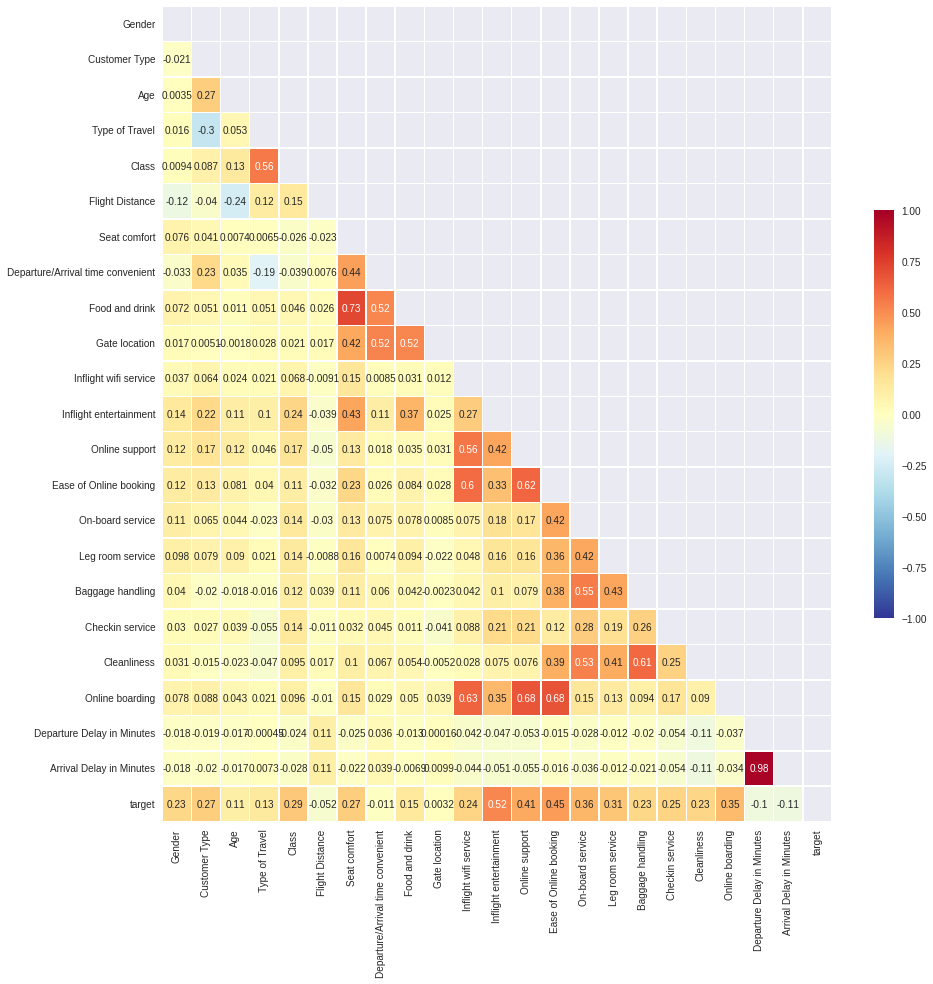

In [ ]:
df=satisfy_train.corr()
fig, ax = plt.subplots(figsize=(15,15))
mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df,
            cmap = 'RdYlBu_r',
            annot = True,   
            mask=mask,     
            linewidths=.5,  
            cbar_kws={"shrink": .5},
            vmin = -1,vmax = 1
           )  
plt.show()

In [ ]:
ordinal_feature = ['Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 
           'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 
           'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding']

In [ ]:
print("Train data missing value")
for feature in ordinal_feature:
    if len(satisfy_train[satisfy_train[feature] == 0]) > 0:
        print(feature, len(satisfy_train[satisfy_train[feature] == 0]))

print("=======================")
        
print("Test data missing value")
for feature in ordinal_feature:
    if len(satisfy_test[satisfy_test[feature] == 0]) > 0:
        print(feature, len(satisfy_test[satisfy_test[feature] == 0]))

Train data missing value
Seat comfort 106
Departure/Arrival time convenient 154
Food and drink 129
Inflight wifi service 2
Inflight entertainment 73
Ease of Online booking 1
Leg room service 11
Online boarding 1
Test data missing value
Seat comfort 64
Departure/Arrival time convenient 90
Food and drink 80
Inflight wifi service 1
Inflight entertainment 39
Leg room service 10


In [ ]:
satisfy_train["Ease of Online booking"][satisfy_train["Ease of Online booking"] == 0] = 3
satisfy_train["Online boarding"][satisfy_train["Online boarding"] == 0] = 3

In [ ]:
for i in range(len(satisfy_train)):
    for feature in ordinal_feature:
        if satisfy_train[feature].iloc[i] == 0:
            satisfy_train[feature].iloc[i] = np.nan

for i in range(len(satisfy_test)):
    for feature in ordinal_feature:
        if satisfy_test[feature].iloc[i] == 0:
            satisfy_test[feature].iloc[i] = np.nan

In [ ]:
corr_matrix = satisfy_train.corr()
corr_matrix["Inflight wifi service"].sort_values(ascending=False)[:5]

Inflight wifi service     1.000000
Online boarding           0.630754
Ease of Online booking    0.602117
Online support            0.562900
Inflight entertainment    0.290907
Name: Inflight wifi service, dtype: float64

In [ ]:
!pip install datawig

In [ ]:
import datawig

target_feature = "Inflight wifi service"

imputer = datawig.SimpleImputer(input_columns=['Online boarding', 'Ease of Online booking', 'Online support'],
                                output_column=target_feature)
imputer.fit(train_df=satisfy_train, num_epochs=50)

null_train =satisfy_train[satisfy_train[target_feature].isnull()]
null_imputed = imputer.predict(null_train)
imputed_train = pd.DataFrame(null_imputed)

n = 0
for i in range(len(satisfy_train)):
    if np.isnan(satisfy_train[target_feature].iloc[i]) == True:
        satisfy_train[target_feature].iloc[i] = int(round(imputed_train[target_feature+"_imputed"].iloc[n]))
        n += 1
        
null_train = satisfy_test[satisfy_test[target_feature].isnull()]
null_imputed = imputer.predict(null_train)
imputed_train = pd.DataFrame(null_imputed)

n = 0
for i in range(len(satisfy_test)):
    if np.isnan(satisfy_test[target_feature].iloc[i]) == True:
        satisfy_test[target_feature].iloc[i] = int(round(imputed_train[target_feature+"_imputed"].iloc[n]))
        n += 1

ValueError: ignored

In [ ]:
import datawig

target_feature = "Leg room service"

imputer = datawig.SimpleImputer(input_columns=['Baggage handling', 'On-board service', 'Cleanliness'],
                                output_column=target_feature)
imputer.fit(train_df=satisfy_train, num_epochs=50)

null_train =satisfy_train[satisfy_train[target_feature].isnull()]
null_imputed = imputer.predict(null_train)
imputed_train = pd.DataFrame(null_imputed)

n = 0
for i in range(len(satisfy_train)):
    if np.isnan(satisfy_train[target_feature].iloc[i]) == True:
        satisfy_train[target_feature].iloc[i] = int(round(imputed_train[target_feature+"_imputed"].iloc[n]))
        n += 1
        
null_train = satisfy_test[satisfy_test[target_feature].isnull()]
null_imputed = imputer.predict(null_train)
imputed_train = pd.DataFrame(null_imputed)

n = 0
for i in range(len(satisfy_test)):
    if np.isnan(satisfy_test[target_feature].iloc[i]) == True:
        satisfy_test[target_feature].iloc[i] = int(round(imputed_train[target_feature+"_imputed"].iloc[n]))
        n += 1


ValueError: ignored

In [ ]:
# 다중공선성이 높을 것으로 예상되는 Food and drink, Depature Delay in minutes 제거
satisfy_train.drop('Departure Delay in Minutes', axis = 1, inplace = True)
satisfy_train.drop('Food and drink', axis = 1, inplace = True)
satisfy_train.drop('Departure/Arrival time convenient', axis = 1, inplace = True)
satisfy_test.drop('Departure Delay in Minutes', axis = 1, inplace = True)
satisfy_test.drop('Food and drink', axis = 1, inplace = True)
satisfy_test.drop('Departure/Arrival time convenient', axis = 1, inplace = True)

In [ ]:
corr_matrix = satisfy_train.corr()
corr_matrix["Seat comfort"].sort_values(ascending=False)[:5]

Seat comfort                         1.000000
Food and drink                       0.692309
Departure/Arrival time convenient    0.497028
Gate location                        0.451671
Inflight entertainment               0.447442
Name: Seat comfort, dtype: float64

In [ ]:
import datawig

target_feature = "Seat comfort"

imputer = datawig.SimpleImputer(input_columns=['Gate location', 'Inflight entertainment'],
                                output_column=target_feature)
imputer.fit(train_df=satisfy_train, num_epochs=50)

null_train =satisfy_train[satisfy_train[target_feature].isnull()]
null_imputed = imputer.predict(null_train)
imputed_train = pd.DataFrame(null_imputed)

n = 0
for i in range(len(satisfy_train)):
    if np.isnan(satisfy_train[target_feature].iloc[i]) == True:
        satisfy_train[target_feature].iloc[i] = int(round(imputed_train[target_feature+"_imputed"].iloc[n]))
        n += 1
        
null_train = satisfy_test[satisfy_test[target_feature].isnull()]
null_imputed = imputer.predict(null_train)
imputed_train = pd.DataFrame(null_imputed)

n = 0
for i in range(len(satisfy_test)):
    if np.isnan(satisfy_test[target_feature].iloc[i]) == True:
        satisfy_test[target_feature].iloc[i] = int(round(imputed_train[target_feature+"_imputed"].iloc[n]))
        n += 1


In [ ]:
satisfy_train.drop(['Food and drink', 'Departure/Arrival time convenient', 'Inflight entertainment', 'Online support', 'Ease of Online booking'], axis=1, inplace=True)
satisfy_test.drop(['Food and drink', 'Departure/Arrival time convenient', 'Inflight entertainment', 'Online support', 'Ease of Online booking'], axis=1, inplace=True)

In [ ]:
satisfy_train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Gate location,Inflight wifi service,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
0,Female,disloyal Customer,22,Business travel,Eco,1599,3.0,3,4.0,5,4.0,4,4,5,4,0,0.0,0
1,Female,Loyal Customer,37,Business travel,Business,2810,2.0,4,1.0,5,4.0,2,1,5,2,18,18.0,0
2,Male,Loyal Customer,46,Business travel,Business,2622,1.0,1,4.0,4,4.0,4,5,4,3,0,0.0,1
3,Female,disloyal Customer,24,Business travel,Eco,2348,3.0,3,3.0,2,4.0,5,3,4,3,10,2.0,0
4,Female,Loyal Customer,58,Business travel,Business,105,3.0,3,4.0,4,4.0,4,4,4,5,0,0.0,1


In [ ]:
satisfy_train.drop('Departure Delay in Minutes', axis = 1, inplace = True)
satisfy_test.drop('Departure Delay in Minutes', axis = 1, inplace = True)


In [ ]:
!pip install pycaret

In [ ]:
from pycaret.classification import *
clf1 = setup(data = satisfy_train,
             silent = True,
             target = 'target',
             session_id = 20201809,
             n_jobs = 7)

,Description,Value
0,session_id,20201809
1,Target,target
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(3000, 17)"
5,Missing Values,False
6,Numeric Features,6
7,Categorical Features,10
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
 compare_models(n_select=3, fold = 10) #상위 모델 3개를 선택합니다

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9109,0.9706,0.9176,0.9255,0.9210,0.8188,0.8200,0.904
rf,Random Forest Classifier,0.9056,0.9609,0.9234,0.9122,0.9173,0.8074,0.8086,0.498
gbc,Gradient Boosting Classifier,0.9028,0.9646,0.9235,0.9075,0.9150,0.8015,0.8027,0.353
et,Extra Trees Classifier,0.8942,0.9590,0.9033,0.9100,0.9062,0.7849,0.7858,0.378
ada,Ada Boost Classifier,0.8538,0.9231,0.8697,0.8723,0.8707,0.7024,0.7029,0.187
dt,Decision Tree Classifier,0.8509,0.8464,0.8797,0.8612,0.8700,0.6951,0.6961,0.034
lda,Linear Discriminant Analysis,0.8457,0.9138,0.8840,0.8500,0.8664,0.6838,0.6851,0.033
ridge,Ridge Classifier,0.8452,0.0000,0.8831,0.8498,0.8660,0.6829,0.6841,0.027
lr,Logistic Regression,0.8404,0.9140,0.8739,0.8493,0.8612,0.6736,0.6745,1.867
nb,Naive Bayes,0.7485,0.8421,0.7603,0.7886,0.7738,0.4907,0.4918,0.038


[LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=7, num_leaves=31, objective=None,
                random_state=20201809, reg_alpha=0.0, reg_lambda=0.0,
                silent='warn', subsample=1.0, subsample_for_bin=200000,
                subsample_freq=0),
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=7,
                        oob_score=False, random_state=20201809, verbose=0,

In [ ]:
blend_3_soft = blend_models(estimator_list=best, method='soft', choose_better = True)
predict_model(blend_3_soft).head(10)

IntProgress(value=0, description='Processing: ', max=6)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,01:59:01
Status,. . . . . . . . . . . . . . . . . .,Finalizing Model
Estimator,. . . . . . . . . . . . . . . . . .,Voting Classifier


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC


BrokenProcessPool: ignored

In [ ]:
final_blend_3_soft = finalize_model(blend_3_soft)
prediction = predict_model(final_blend_3_soft, data = satisfy_test)

In [ ]:
print(prediction["Label"])

0       1
1       0
2       1
3       1
4       1
       ..
1995    0
1996    1
1997    0
1998    1
1999    1
Name: Label, Length: 2000, dtype: int64


In [ ]:
submission = pd.read_csv('/content/drive/MyDrive/sample_submission.csv')

In [ ]:
submission.head()

,id,target
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [ ]:
submission['target'] = prediction['Label']
submission.head()

,id,target
0,1,1
1,2,0
2,3,1
3,4,1
4,5,1


In [ ]:
submission.to_csv("Satisfy_predict-4.csv",index=False)